<a href="https://colab.research.google.com/github/rinermdhn/Komputasi-Statistika---BMI-Classification/blob/main/Project_Kompstat_Kelompok_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Anggota Kelompok G:
  1. Azarine Aisyah R (2206051550)
  2. Farhan Akhtar G (2206027665)
  3. Nadira Eka R (2206051525)
  4. Makayla Adzra K (2206053884)
  5. Syazana Alya A (2206053871)

# Pendahuluan
Pada project ini, kami memiliki tujuan untuk mengelompokkan Indeks Massa Tubuh (IMT) (Normal/Gemuk/Obesitas/kurus/sangat kurus) berdasarkan variabel-variabel yang sudah kami tentukan lalu membandingkannya dengan kelompok imt yang sebenarnya. Kami menggunakan algoritma k-means untuk melakukannya dengan data yang sudah disediakan di EMAS-2 dengan nama file 'data_kesehatan-Mental-SRQ-2023--Filtered.xlsx'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!gdown 13fvHF3QFuMxqz1n8S-qVVd8MfboPyt4d

Downloading...
From: https://drive.google.com/uc?id=13fvHF3QFuMxqz1n8S-qVVd8MfboPyt4d
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx
100% 110M/110M [00:02<00:00, 37.4MB/s]


In [ ]:
data = pd.read_excel('data_kesehatan-Mental-SRQ-2023--Filtered.xlsx')
data.head(5)

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.796114,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.364563,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.883912,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.753975,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.911836,Normal


In [ ]:
print('shape:',data.shape)

shape: (289801, 79)


# Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

Dilakukan penghapusan variabel-variabel yang tidak dibutuhkan

In [ ]:
data = data[['USIA','TINGGI BADAN','BERAT BADAN','LINGKAR PINGGANG','Kelompok Umur','NILAI IMT','IMT']]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   USIA              289801 non-null  float64
 1   TINGGI BADAN      289801 non-null  object 
 2   BERAT BADAN       289801 non-null  float64
 3   LINGKAR PINGGANG  289801 non-null  float64
 4   Kelompok Umur     289801 non-null  object 
 5   NILAI IMT         289794 non-null  float64
 6   IMT               289794 non-null  object 
dtypes: float64(4), object(3)
memory usage: 15.5+ MB


Mengubah variabel "TINGGI BADAN" ke variabel numerik

In [ ]:
data['TINGGI BADAN'] = pd.to_numeric(data['TINGGI BADAN'], errors='coerce')
value=17.1
data['TINGGI BADAN'].fillna(value, inplace=True)  # Replace NaN with a default value

In [ ]:
data.describe()

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,NILAI IMT
count,2.898010e+05,289801.000000,289801.000000,289801.000000,289794.000000
mean,4.317251e+02,169.270246,96.176577,65.558079,50.528637
std,7.551491e+04,7.678438,887.911773,188.430313,2100.095194
min,1.500000e+01,1.640000,1.000000,-75.000000,0.367309
25%,2.900000e+01,167.000000,66.000000,36.000000,23.306680
50%,3.800000e+01,170.000000,72.000000,73.000000,25.099502
75%,4.400000e+01,172.000000,80.000000,84.000000,27.548209
max,2.309198e+07,1799.000000,90210.000000,100000.000000,318877.551020


Melihat apakah terdapat missing values pada variabel-variabel




In [ ]:
data.isna().sum()

USIA                0
TINGGI BADAN        0
BERAT BADAN         0
LINGKAR PINGGANG    0
Kelompok Umur       0
NILAI IMT           7
IMT                 7
dtype: int64

Karena terdapat missing values, akan dihilangkan baris yang mengandung missing values tersebut

In [ ]:
data_cleaned = data.dropna()
data_cleaned.isna().sum()

USIA                0
TINGGI BADAN        0
BERAT BADAN         0
LINGKAR PINGGANG    0
Kelompok Umur       0
NILAI IMT           0
IMT                 0
dtype: int64

In [ ]:
print('New Shape: ',data_cleaned.shape)

New Shape:  (289794, 7)


Mencari outlier pada variabel "NILAI IMT"

Lower Bound: 16.94438608308201
Upper Bound: 33.91050333637669
Potential Outliers:
22           152.199762
39          2422.145329
52             2.398668
69        238751.147842
77        253069.320475
              ...      
289736         8.458285
289737         5.443461
289739         5.254269
289798         1.724008
289800        34.198557
Name: NILAI IMT, Length: 5745, dtype: float64


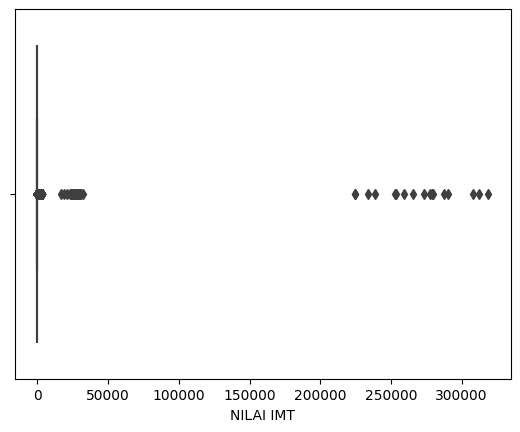

In [ ]:
# Mencari outlier
column_data = data_cleaned['NILAI IMT']

sns.boxplot(x=column_data)

# Calculating IQR
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

upper_array = np.where(data_cleaned['NILAI IMT']>=upper_bound)[0]
lower_array = np.where(data_cleaned['NILAI IMT']<=lower_bound)[0]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(outliers)

Menghapus outliers pada variabel "NILAI IMT"

In [ ]:
data_cleaned = data_cleaned[data_cleaned['NILAI IMT'] <= upper_bound]
data_cleaned = data_cleaned[data_cleaned['NILAI IMT'] >= lower_bound]

Proses di atas dilakukan kembali untuk variabel-variabel lainnya

Lower Bound: 6.5
Upper Bound: 66.5
Potential Outliers:
6414       100.0
7780        78.0
8975        77.0
9226        67.0
9333       371.0
           ...  
283472     191.0
283655      97.0
284231    2022.0
286673      71.0
287617     522.0
Name: USIA, Length: 243, dtype: float64


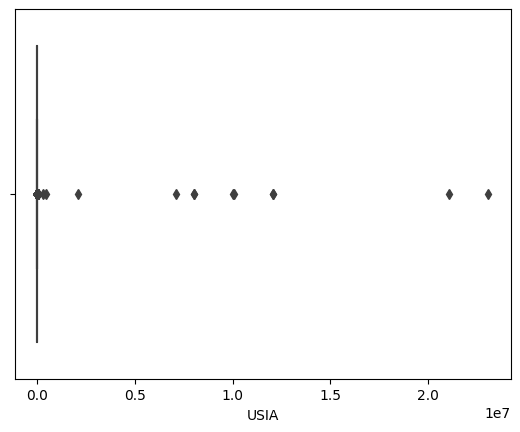

In [ ]:
# Mencari outlier
column_data = data_cleaned['USIA']

sns.boxplot(x=column_data)

# Calculating IQR
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

upper_array = np.where(data_cleaned['USIA']>=upper_bound)[0]
lower_array = np.where(data_cleaned['USIA']<=lower_bound)[0]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(outliers)

In [ ]:
data_cleaned = data_cleaned[data_cleaned['USIA'] <= upper_bound] #Drop outliers
data_cleaned = data_cleaned[data_cleaned['USIA'] >= lower_bound]

Lower Bound: 159.5
Upper Bound: 179.5
Potential Outliers:
42        150.0
47        156.0
86        156.5
87        157.5
132       150.0
          ...  
289664    180.0
289749    180.0
289763    150.0
289768    180.0
289797    155.0
Name: TINGGI BADAN, Length: 14242, dtype: float64


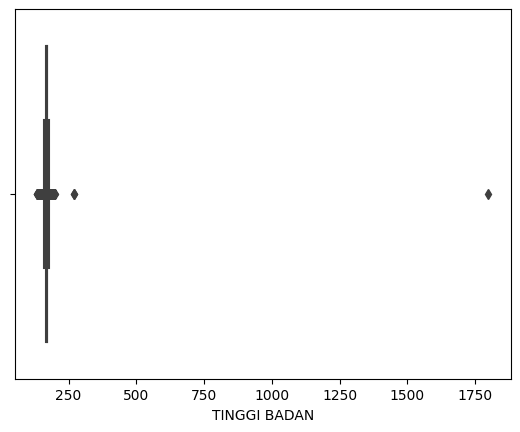

In [ ]:
# Mencari outlier
column_data = data_cleaned['TINGGI BADAN']

sns.boxplot(x=column_data)

# Calculating IQR
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

upper_array = np.where(data_cleaned['TINGGI BADAN']>=upper_bound)[0]
lower_array = np.where(data_cleaned['TINGGI BADAN']<=lower_bound)[0]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(outliers)

In [ ]:
data_cleaned = data_cleaned[data_cleaned['TINGGI BADAN'] <= upper_bound] #Drop outliers
data_cleaned = data_cleaned[data_cleaned['TINGGI BADAN'] >= lower_bound]

Lower Bound: 45.0
Upper Bound: 101.0
Potential Outliers:
6093      105.0
6094      105.0
6095      105.0
6096      105.0
6097      105.0
          ...  
12137     102.0
12138     102.0
12139     102.0
289368     44.0
289409     44.0
Name: BERAT BADAN, Length: 192, dtype: float64


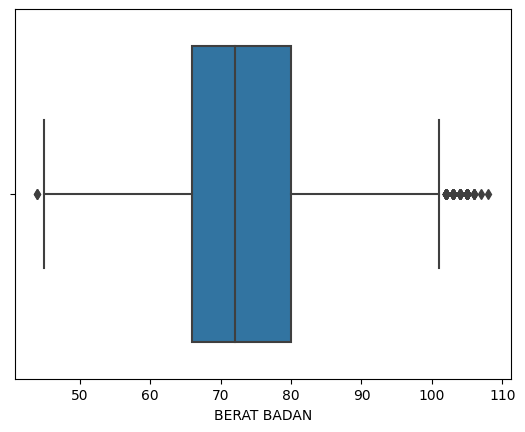

In [ ]:
# Mencari outlier
column_data = data_cleaned['BERAT BADAN']

sns.boxplot(x=column_data)

# Calculating IQR
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

upper_array = np.where(data_cleaned['BERAT BADAN']>=upper_bound)[0]
lower_array = np.where(data_cleaned['BERAT BADAN']<=lower_bound)[0]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(outliers)

In [ ]:
data_cleaned = data_cleaned[data_cleaned['BERAT BADAN'] <= upper_bound] #Drop outliers
data_cleaned = data_cleaned[data_cleaned['BERAT BADAN'] >= lower_bound]

Lower Bound: -37.0
Upper Bound: 155.0
Potential Outliers:
361          173.0
442          170.0
6289         175.0
8299         205.0
8356         180.0
            ...   
267986       175.0
269699       175.0
271055       174.0
273363       751.0
287706    100000.0
Name: LINGKAR PINGGANG, Length: 147, dtype: float64


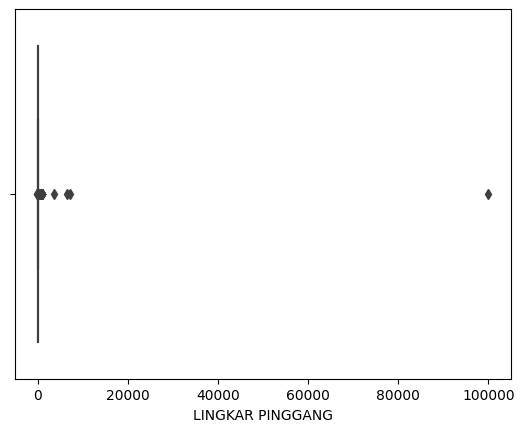

In [ ]:
# Mencari outlier
column_data = data_cleaned['LINGKAR PINGGANG']

sns.boxplot(x=column_data)

# Calculating IQR
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

upper_array = np.where(data_cleaned['LINGKAR PINGGANG']>=upper_bound)[0]
lower_array = np.where(data_cleaned['LINGKAR PINGGANG']<=lower_bound)[0]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(outliers)

In [ ]:
data_cleaned = data_cleaned[data_cleaned['LINGKAR PINGGANG'] <= upper_bound] #Drop outliers
data_cleaned = data_cleaned[data_cleaned['LINGKAR PINGGANG'] >= lower_bound]

In [ ]:
print('new shape:',data_cleaned.shape)

new shape: (269225, 7)


Melihat hasil setelah menghapus outlier pada variabel "NILAI IMT","USIA", "TINGGI BADAN","BERAT BADAN", dan "LINGKAR PINGGANG"

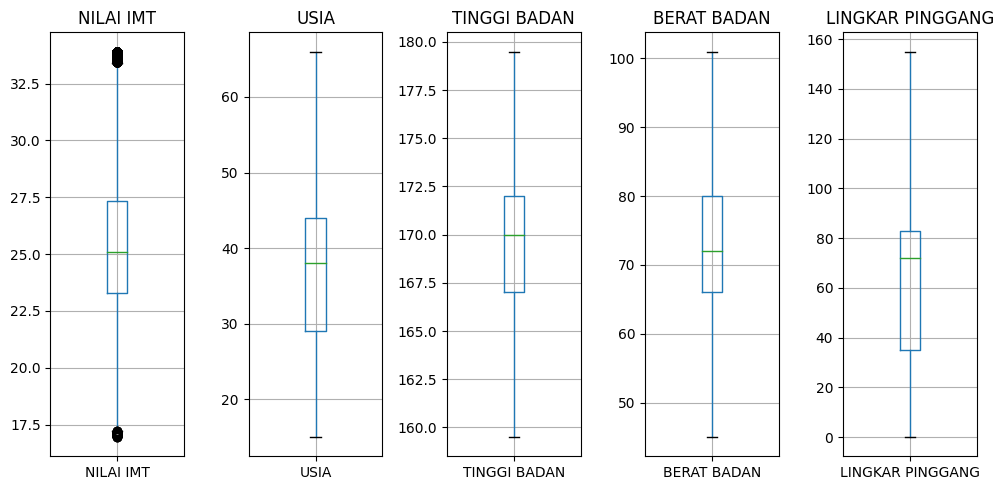

In [ ]:
 # Selecting specific columns for boxplot
columns = ['NILAI IMT','USIA', 'TINGGI BADAN', 'BERAT BADAN', 'LINGKAR PINGGANG']

# Creating subplots with boxplots for specific columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 5))

# Creating boxplots for each selected column without outliers
for i, col in enumerate(columns):
    data_cleaned.boxplot(column=col, ax=axes[i], showfliers=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
data_cleaned

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Kelompok Umur,NILAI IMT,IMT
0,34.0,168.9,85.0,100.0,25 - 34,29.796114,Obesitas
1,43.0,169.5,70.0,80.0,35 - 44,24.364563,Normal
2,21.0,169.5,60.0,78.0,15 - 24,20.883912,Normal
3,40.0,166.8,80.0,34.0,35 - 44,28.753975,Obesitas
4,28.0,164.5,62.0,32.0,25 - 34,22.911836,Normal
...,...,...,...,...,...,...,...
289793,29.0,169.0,60.0,75.0,25 - 34,21.007668,Normal
289794,46.0,169.0,60.0,32.0,45 - 54,21.007668,Normal
289795,53.0,169.0,60.0,70.0,45 - 54,21.007668,Normal
289796,23.0,169.0,60.0,78.0,15 - 24,21.007668,Normal


# EDA

In [ ]:
data_cleaned.describe()

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,NILAI IMT
count,269225.000000,269225.000000,269225.000000,269225.000000,269225.000000
mean,36.883544,169.418468,72.751598,64.429922,25.330465
std,9.782273,3.821967,9.104557,24.753121,2.929970
min,15.000000,159.500000,45.000000,0.000000,16.955017
25%,29.000000,167.000000,66.000000,35.000000,23.306680
50%,38.000000,170.000000,72.000000,72.000000,25.099502
75%,44.000000,172.000000,80.000000,83.000000,27.358845
max,66.000000,179.500000,101.000000,155.000000,33.910035


## Visualisasi

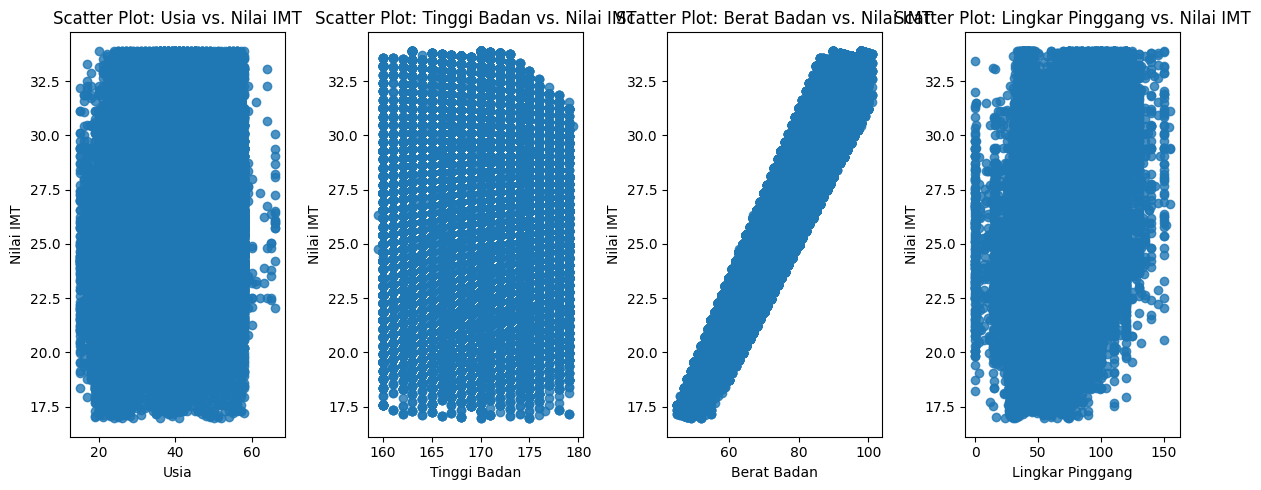

In [ ]:
tinggi_badan = [data_cleaned['TINGGI BADAN']]
berat_badan = [data_cleaned['BERAT BADAN']]
nilai_imt = [data_cleaned['NILAI IMT']]
usia=[data_cleaned['USIA']]
lingkar_pinggang=[data_cleaned['LINGKAR PINGGANG']]

plt.figure(figsize=(12, 5))

# Scatter plot antara usia dan nilai IMT
plt.subplot(1, 4, 1)
plt.scatter(usia, nilai_imt, alpha=0.8)
plt.title('Scatter Plot: Usia vs. Nilai IMT')
plt.xlabel('Usia')
plt.ylabel('Nilai IMT')

# Scatter plot antara tinggi badan dan nilai IMT
plt.subplot(1, 4, 2)
plt.scatter(tinggi_badan, nilai_imt, alpha=0.8)
plt.title('Scatter Plot: Tinggi Badan vs. Nilai IMT')
plt.xlabel('Tinggi Badan')
plt.ylabel('Nilai IMT')

# Scatter plot antara berat badan dan nilai IMT
plt.subplot(1, 4, 3)
plt.scatter(berat_badan, nilai_imt, alpha=0.8)
plt.title('Scatter Plot: Berat Badan vs. Nilai IMT')
plt.xlabel('Berat Badan')
plt.ylabel('Nilai IMT')

# Scatter plot antara lingkar pinggang dan nilai IMT
plt.subplot(1, 4, 4)
plt.scatter(lingkar_pinggang, nilai_imt, alpha=0.8)
plt.title('Scatter Plot: Lingkar Pinggang vs. Nilai IMT')
plt.xlabel('Lingkar Pinggang')
plt.ylabel('Nilai IMT')

# Menyesuaikan tata letak dan menampilkan plot
plt.tight_layout()
plt.show()

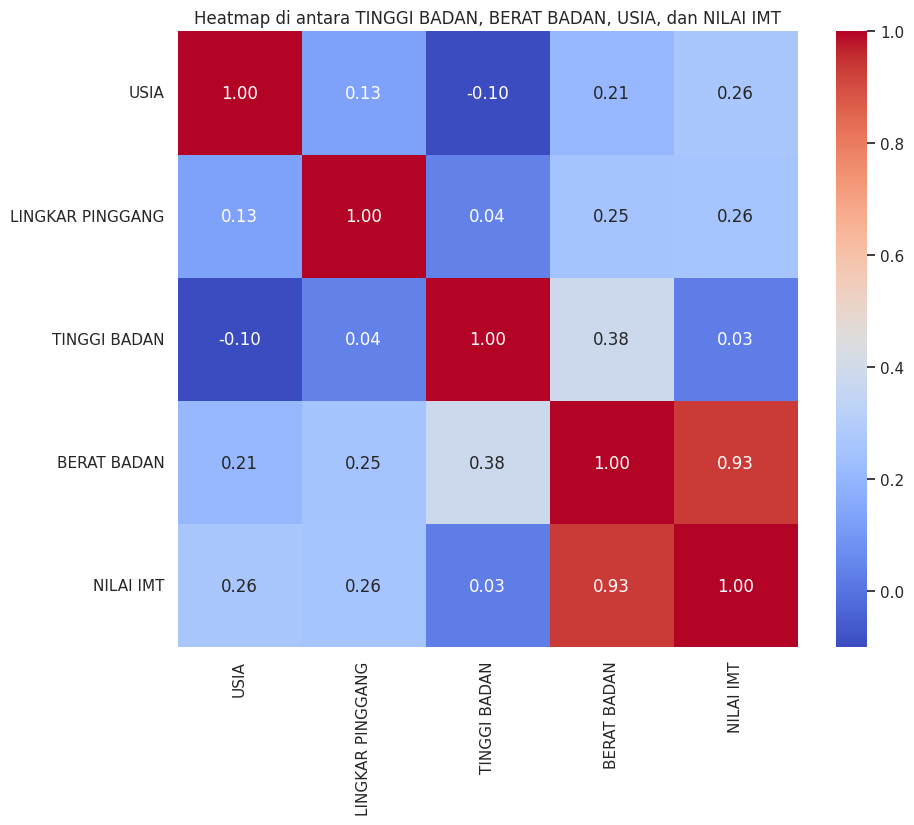

In [ ]:
selected_columns = ['Kelompok Umur','USIA','LINGKAR PINGGANG','TINGGI BADAN', 'BERAT BADAN', 'NILAI IMT']
heatmap_data = data_cleaned[selected_columns]

sns.set()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap di antara TINGGI BADAN, BERAT BADAN, USIA, dan NILAI IMT')
plt.show()

In [ ]:
data_cleaned.corr()

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,NILAI IMT
USIA,1.000000,-0.100666,0.206011,0.129246,0.261446
TINGGI BADAN,-0.100666,1.000000,0.382953,0.040290,0.025532
BERAT BADAN,0.206011,0.382953,1.000000,0.250917,0.932268
LINGKAR PINGGANG,0.129246,0.040290,0.250917,1.000000,0.255047
NILAI IMT,0.261446,0.025532,0.932268,0.255047,1.000000


Pada heatmap di atas didapat visualisasi mengenai korelasi dan nilai korelasi antar variabel-variabel pada data_cleaned.
*   Korelasi antara NILAI IMT dengan TINGGI BADAN sangatlah kecil yaitu 0.03
*   Korelasi anatar LINGKAR PINGGANG dengan NILAI IMT dan USIA dengan NILAI IMT sebesar 0.26
*   korelasi antara NILAI IMT dengan BERAT BADAN tinggi yaitu 0,93

Maka bisa disimpulkan bahwa korelasi BERAT BADAN dengan NILAI IMT adalah yang paling signifikan

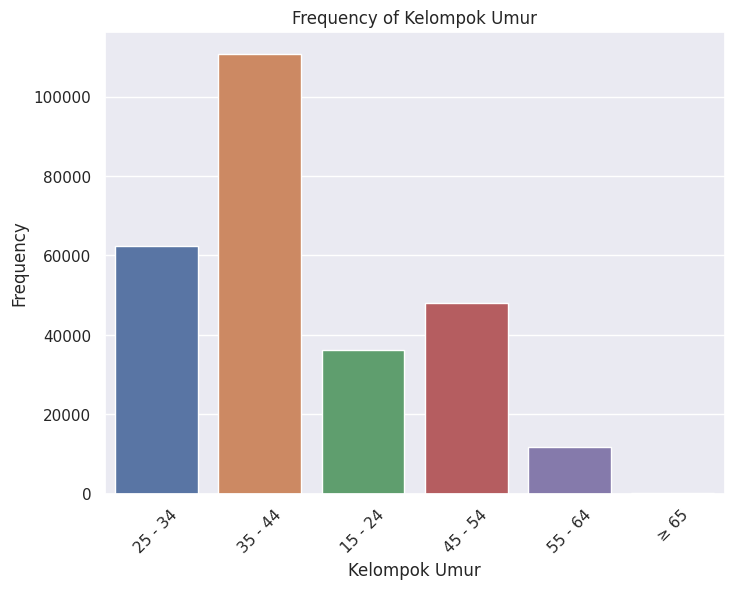

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Frequency')
plt.title('Frequency of Kelompok Umur')
plt.xticks(rotation=45)
plt.show()

Histogram di atas adalah persebaran umur responden.
*   jumlah responden pada rentang umur 55-64 adalah yang paling sedikit dengan jumlah di bawa 20000
*   jumlah responden pada rentang umur 35-44 yang mencapai di atas 100000

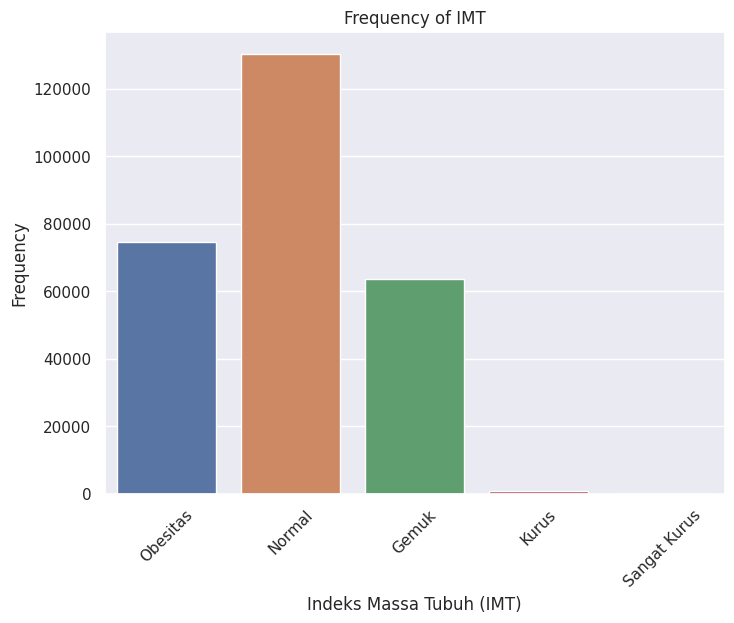

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='IMT')
plt.xlabel('Indeks Massa Tubuh (IMT)')
plt.ylabel('Frequency')
plt.title('Frequency of IMT')
plt.xticks(rotation=45)
plt.show()

## Aggregate

In [ ]:
# Rata-rata nilai IMT per kelompok umur
data_cleaned.groupby('Kelompok Umur')['NILAI IMT'].mean()


Kelompok Umur
15 - 24    23.159899
25 - 34    25.115818
35 - 44    25.820527
45 - 54    26.006022
55 - 64    25.782231
≥ 65       25.628243
Name: NILAI IMT, dtype: float64

Dapat dilihat bahwa kelompok umur 45-54 memiliki rata-rata tertinggi yaitu 26.006022

In [ ]:
# Jumlah rata-rata badan per kelompok IMT
data.groupby('IMT')['BERAT BADAN'].agg(['count', 'mean'])


,count,mean
IMT,,
Gemuk,66861,74.657664
Kurus,906,51.000000
Normal,137596,65.827165
Obesitas,84095,163.606883
Sangat Kurus,336,52.347530


# Label Encoding

In [ ]:
# Mengimport modul yang diperlukan

from sklearn.preprocessing import LabelEncoder

data_encoded = pd.DataFrame(data_cleaned)
# Kolom-kolom yang ingin di-label encode
kolom_encode = ['Kelompok Umur', 'IMT']

label_encoder = LabelEncoder()
for kolom in kolom_encode:
    data_encoded[kolom] = label_encoder.fit_transform(data_encoded[kolom])

data_encoded.head()

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Kelompok Umur,NILAI IMT,IMT
0,34.0,168.9,85.0,100.0,1,29.796114,3
1,43.0,169.5,70.0,80.0,2,24.364563,2
2,21.0,169.5,60.0,78.0,0,20.883912,2
3,40.0,166.8,80.0,34.0,2,28.753975,3
4,28.0,164.5,62.0,32.0,1,22.911836,2


Didapat hasil dari Label Encoding sebagai berikut.

Kelompok Umur:
*   0: 15-24
*   1: 25-34
*   2: 35-44
*   3: 45-54
*   4: 55-64
*   5: ≥ 65

IMT:
*   0: Gemuk
*   1: Kurus
*   2: Normal
*   3: Obesitas
*   4: Sangat kurus





In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269225 entries, 0 to 289799
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   USIA              269225 non-null  float64
 1   TINGGI BADAN      269225 non-null  float64
 2   BERAT BADAN       269225 non-null  float64
 3   LINGKAR PINGGANG  269225 non-null  float64
 4   Kelompok Umur     269225 non-null  int64  
 5   NILAI IMT         269225 non-null  float64
 6   IMT               269225 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 16.4 MB


# Feature Selection

In [ ]:
data_encoded

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Kelompok Umur,NILAI IMT,IMT
0,34.0,168.9,85.0,100.0,1,29.796114,3
1,43.0,169.5,70.0,80.0,2,24.364563,2
2,21.0,169.5,60.0,78.0,0,20.883912,2
3,40.0,166.8,80.0,34.0,2,28.753975,3
4,28.0,164.5,62.0,32.0,1,22.911836,2
...,...,...,...,...,...,...,...
289793,29.0,169.0,60.0,75.0,1,21.007668,2
289794,46.0,169.0,60.0,32.0,3,21.007668,2
289795,53.0,169.0,60.0,70.0,3,21.007668,2
289796,23.0,169.0,60.0,78.0,0,21.007668,2


In [ ]:
# Pearson Correlation Feature Selection

corr_data = data_cleaned.corr()
corr_data

,USIA,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Kelompok Umur,NILAI IMT,IMT
USIA,1.000000,-0.100666,0.206011,0.129246,0.963291,0.261446,-0.001431
TINGGI BADAN,-0.100666,1.000000,0.382953,0.040290,-0.102729,0.025532,0.008000
BERAT BADAN,0.206011,0.382953,1.000000,0.250917,0.206180,0.932268,0.222321
LINGKAR PINGGANG,0.129246,0.040290,0.250917,1.000000,0.125003,0.255047,0.064886
Kelompok Umur,0.963291,-0.102729,0.206180,0.125003,1.000000,0.262175,-0.001322
NILAI IMT,0.261446,0.025532,0.932268,0.255047,0.262175,1.000000,0.237381
IMT,-0.001431,0.008000,0.222321,0.064886,-0.001322,0.237381,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

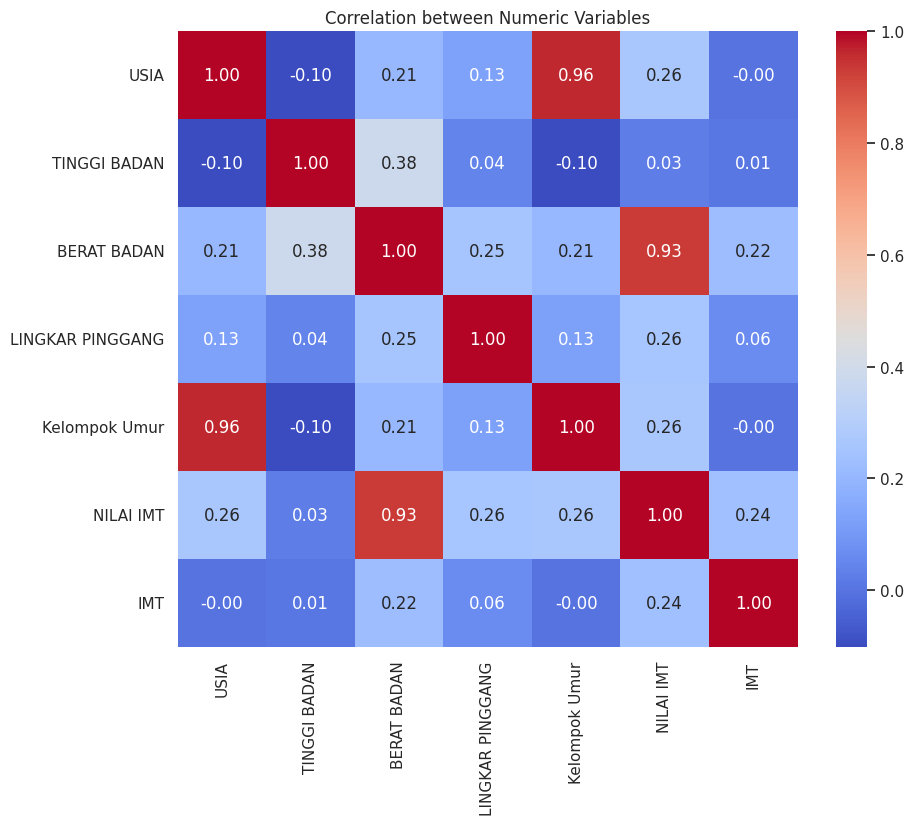

In [ ]:
# Membuat heatmap dari Pearson Correlation

plt.figure(figsize = (10,8))
sns.heatmap(corr_data, cmap = 'coolwarm', fmt=".2f", annot = True)

plt.title('Correlation between Numeric Variables')
plt.show

Pada heatmap tersebut, terlihat bahwa berat badan memiliki korelasi yang tinggi dengan Nilai IMT. Kotak dari berat badan memiliki warna merah, berbeda dengan fitur lain yang berwarna biru. Melalui Feature Selection menggunakan perhitungan Pearson, hanya fitur berat badan yang dipertimbangkan memiliki hubungan erat dengan Nilai IMT.

Selain itu, dua fitur lain yang bisa dikatakan memiliki korelasi yang tinggi adalah berat badan dan tinggi badan.

# K-Means Clustering

Algoritma K-means Clustering

Parameters:

*   X: Input data. numpy array, shape (n_samples, n_features).
*   k: Banyak cluster yang diinginkan.
*   max_iters: Maximum jumlah iterasi. int, optional (default=100)
*   tol: Toleransi konvergensi . float, optional (default=1e-4)

Returns:

*   centroids: Nilai akhir centroid. numpy array, shape (k, n_features)
*   labels: Cluster dari setiap sampel. numpy array, shape (n_samples,)

## K-Means Clustering dengan Mahalanobis

In [ ]:
from scipy.spatial.distance import cdist
def k_means_mahalanobis(X, k, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape

    # Memilih centroid awal secara random dari data
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Menghitung jarak menggunakan jarak mahalanobis
        distances = cdist(X, centroids, metric='mahalanobis')

        # Menyusun setiap sampel ke centroid terdekat
        labels = np.argmin(distances, axis=1)

        # Mengubah centroid
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Mengecek konvergensi
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels


np.random.seed(99)
X = data_encoded[['USIA','LINGKAR PINGGANG','TINGGI BADAN','BERAT BADAN','NILAI IMT']].values
k = 4

centroids1, labels1 = k_means_mahalanobis(X, k)

# Mencetak nilai centroid akhir dan cluster setiap sampel
print("Final centroids:\n", centroids1)
print("Cluster labels:\n", labels1)

Final centroids:
 [[ 31.62720764  60.72544599 172.0639875   68.3066341   23.06840512]
 [ 33.35302543  58.63585819 165.4732126   62.62825302  22.87351631]
 [ 36.69114993  73.15079184 173.62848557  85.10388949  28.24606347]
 [ 42.61632888  66.29284195 167.64300158  75.77212023  26.96840294]]
Cluster labels:
 [3 3 0 ... 0 0 0]


Final centroid: baris merupakan centroid kolom merupakan data, misal baris ke-1 merupakan centroid 1 dari semua data, dan kolom ke-1 merupakan semua keempat centroid dari data ke-1

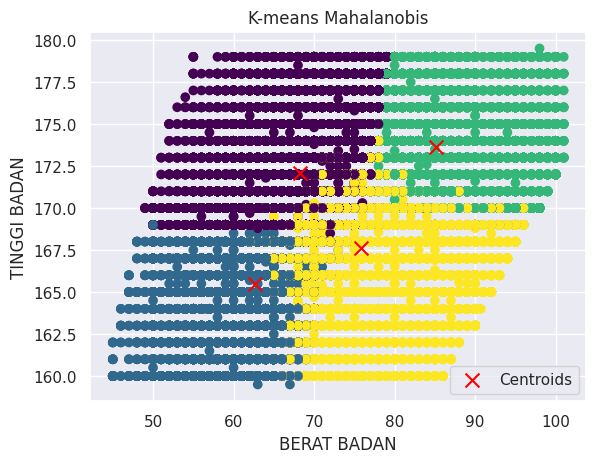

In [ ]:
# Membuat plot dari cluster
plt.scatter(X[:, 3], X[:, 2], c=labels1, cmap='viridis')
plt.scatter(centroids1[:, 3], centroids1[:, 2], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('BERAT BADAN')
plt.ylabel('TINGGI BADAN')
plt.title('K-means Mahalanobis')
plt.legend()
plt.show()

## K-Means Clustering dengan Chebyshev

In [ ]:
def k_means_chebyshev(X, k, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape

    # Memilih centroid awal secara random dari data
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Menghitung jarak menggunakan jarak chebyshev
        distances = cdist(X, centroids, metric='chebyshev')

        # Menyusun setiap sampel ke centroid terdekat
        labels = np.argmin(distances, axis=1)

        # Mengubah centroid
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Mengecek konvergensi
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels


np.random.seed(99)
X = data_encoded[['USIA','LINGKAR PINGGANG','TINGGI BADAN','BERAT BADAN','NILAI IMT']].values
k = 4

centroids2, labels2 = k_means_chebyshev(X, k)

# Mencetak nilai centroid akhir dan cluster setiap sampel
print("Final centroids:\n", centroids2)
print("Cluster labels:\n", labels2)

Final centroids:
 [[ 25.68416831  32.32899621 169.29050171  65.1187778   22.71843248]
 [ 35.59308086  41.65617603 170.49988661  78.65249353  27.05660381]
 [ 43.11748245  34.16383892 168.29495017  68.89387795  24.32635056]
 [ 37.49111579  82.2827392  169.47909754  73.67488633  25.63293976]]
Cluster labels:
 [3 3 3 ... 3 3 3]


Final centroid: baris merupakan centroid kolom merupakan data, misal baris ke-1 merupakan centroid 1 dari semua data, dan kolom ke-1 merupakan semua keempat centroid dari data ke-1

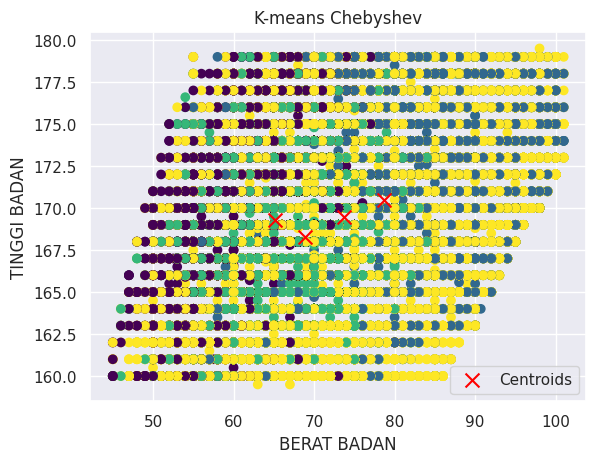

In [ ]:
# Membuat plot dari cluster
plt.scatter(X[:, 3], X[:, 2], c=labels2, cmap='viridis')
plt.scatter(centroids2[:, 3], centroids2[:, 2], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('BERAT BADAN')
plt.ylabel('TINGGI BADAN')
plt.title('K-means Chebyshev')
plt.legend()
plt.show()

## K-Means Clustering dengan Euclidean

In [ ]:
def k_means_euclidean(X, k, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape

    # Memilih centroid awal secara random dari data
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Menghitung jarak menggunakan jarak euclidean
        distances = cdist(X, centroids, metric='euclidean')

        # Menyusun setiap sampel ke centroid terdekat
        labels = np.argmin(distances, axis=1)

        # Mengubah centroid
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Mengecek konvergensi
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels


np.random.seed(99)
X = data_encoded[['USIA','LINGKAR PINGGANG','TINGGI BADAN','BERAT BADAN','NILAI IMT']].values
k = 4

centroids3, labels3 = k_means_euclidean(X, k)

# Mencetak nilai centroid akhir dan cluster setiap sampel
print("Final centroids:\n", centroids3)
print("Cluster labels:\n", labels3)

Final centroids:
 [[ 25.08971872  36.15935681 169.49491695  65.97992241  22.9612559 ]
 [ 38.68974892  37.58058532 170.83776939  81.74950584  28.03250951]
 [ 42.63511818  34.65401705 167.96908914  67.22458324  23.83463576]
 [ 37.53462894  82.11904314 169.47694992  73.70344208  25.64447273]]
Cluster labels:
 [3 3 3 ... 3 3 3]


Final centroid: baris merupakan centroid kolom merupakan data, misal baris ke-1 merupakan centroid 1 dari semua data, dan kolom ke-1 merupakan semua keempat centroid dari data ke-1

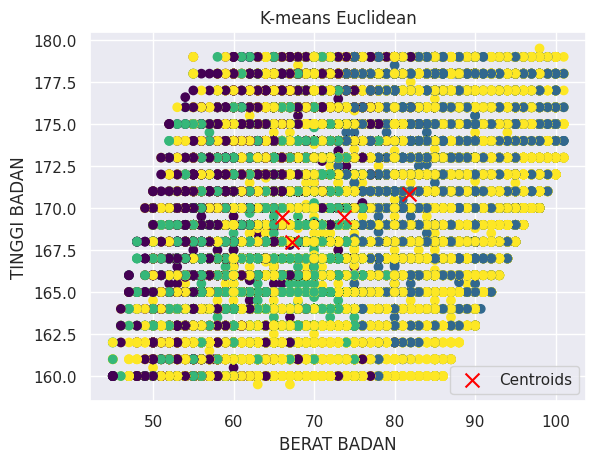

In [ ]:
# Membuat plot dari cluster
plt.scatter(X[:, 3], X[:, 2], c=labels3, cmap='viridis')
plt.scatter(centroids3[:, 3], centroids3[:, 2], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('BERAT BADAN')
plt.ylabel('TINGGI BADAN')
plt.title('K-means Euclidean')
plt.legend()
plt.show()

# Perbandingan Cluster dengan pengelompokkan IMT asli

In [ ]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm1 * norm2)

    return similarity

In [ ]:
# K-Means Mahalanobis
cosine_similarity(labels1, data_encoded['IMT'])

0.6749726829030229

In [ ]:
# K-Means Chebyshev
cosine_similarity(labels2, data_encoded['IMT'])

0.775288550496836

In [ ]:
# K-Means Euclidean
cosine_similarity(labels3, data_encoded['IMT'])

0.7703492403880557

Dengan menghitung kemiripan kosinus, kita dapat mengukur sejauh mana dua vektor berada dalam arah yang sama dalam ruang vektor. Semakin tinggi nilai kemiripan kosinus, semakin mirip kedua vektor tersebut. Di sini kita ingin melihat apakah cluster yang dihasilkan untuk setiap sampel sesuai dengan pengelompokan IMT asli dari sampel tersebut dimana cluster 0 menandakan IMT 0 (gemuk), cluster 1 menandakan IMT 1 (kurus), cluster 2 menandakan IMT 2 (normal), cluster 3 menandakan IMT 3 (obesitas). Dapat disimpulkan bahwa Cluster yang dihasilkan oleh K-Means Clustering dengan pengukuran jarak Chebyshev paling mirip dengan pengelompokkan IMT asli dari sampel karena nilai cosine similaritynya paling besar dibanding dua pengukuran jarak yang lain.

# Parallel Computing

In [ ]:
0# Run di terminal
import multiprocessing as mp
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import time

np.random.seed(42)

def k_means_clustering(X, k, max_iters, tol):

    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        distances = cdist(X, centroids, metric='mahalanobis')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return centroids, labels

if __name__ == '__main__':
    print('cpu cores : ' + str(mp.cpu_count()))

    data_encoded = pd.read_csv('data_encoded.csv')
    data = data_encoded[['USIA', 'LINGKAR PINGGANG', 'TINGGI BADAN', 'BERAT BADAN', 'NILAI IMT']].values
    k = 4
    max_iters = 200
    tol = 0

    input_args = [(data, k, max_iters, tol)]

    process_pool = mp.Pool(4)
    print('process pool : 4')

    print('Parallel Programming (Starmap):')
    start = time.time()
    output = process_pool.starmap(k_means_clustering, input_args)
    end = time.time()
    print("Waktu parallel: {}".format(end - start))
    print(output[0:3][0][1])

    print('Serial/Sequential Programming biasa:')
    mulai =  time.time()
    outputs = [k_means_clustering(data, k, max_iters, tol)]
    akhir  = time.time()
    print("Waktu Serial: {}".format(akhir-mulai))
    print(outputs[0:3][0][1])

Dilakukan perbandingan komputasi k-means clustering menggunakan distance Euclidean, Chebysev dan Mahalanobis dengan k=4, jumlah iterasi = 200 dan 0 tolerance sehingga kedua proses dijalankan untuk keseluruhan 200 iterasi. Digunakan metode Starmap karena komputasi fungsi yang diparallelkan adalah fungsi multivariat (dalam hal ini menerima lebih dari 1 argumen) dengan menggunakan 4 process pool.

Euclidean

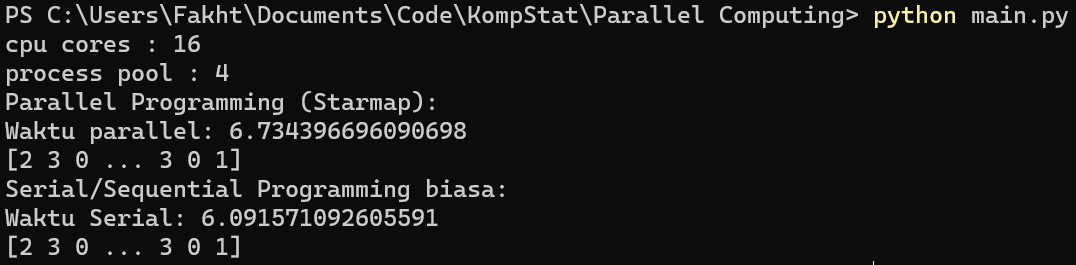

Chebysev

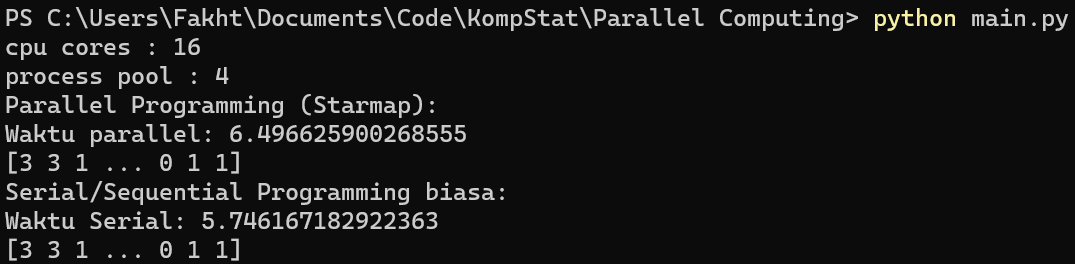

Mahalanobis

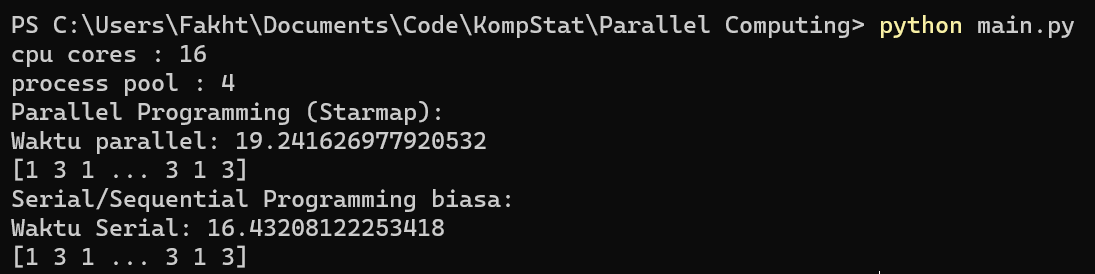

Didapat output waktu pemrosesan untuk pemrograman parallel dengan metode Starmap secara keseluruhan lebih lambat dari pemrosesan secara sequential, sehingga dapat dikatakan bahwa penerapan parallel programming pada pemrosesan algoritma k-means clustering tidak mempercepat proses komputasi.

# Link Youtube Video Presentasi

https://youtu.be/iYLvxI2G-i8